# Throughput

## Import Data

In [1]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
data_frames = []

for file in glob.glob("*.orun.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df['variant'] = file.replace(".orun.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

<ipython-input-2-0958bbb059cf>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,25.892875,25.884,0.004,32580,59048.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,163,4194471,8218,4,5790208,4,5790208,0,1,4.12.0+PR+2bb2bde
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,26.781826,26.760,0.020,32404,59960.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,163,4194471,8218,4,5790208,4,5790208,0,1,4.12.0+younglimit
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,25.289278,25.256,0.028,20980,147388.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,1931671,2463773,4689,11,2093568,14,2093568,0,0,4.12.0+PR+2bb2bde
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,24.060072,24.032,0.020,21540,149904.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,1939335,2471437,4691,11,2093568,14,2093568,0,0,4.12.0+younglimit
24,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,44.677237,44.584,0.088,154096,241404.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,270360191,270360191,3527,63,18974208,33,18974208,0,1,4.12.0+PR+2bb2bde
24,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,44.540735,44.440,0.096,154976,245084.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,270360191,270360191,3527,63,18974208,33,18974208,0,1,4.12.0+younglimit
29,cpdf.blacktext,taskset --cpu-list 5 cpdf -blacktext benchmark...,14.669133,14.596,0.072,125240,1002064.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,26065574,27995503,221,15,14326272,21,14326272,0,3,4.12.0+younglimit
29,cpdf.blacktext,taskset --cpu-list 5 cpdf -blacktext benchmark...,14.608493,14.544,0.060,125184,984368.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,26065574,27995503,221,15,14326272,21,14326272,0,3,4.12.0+PR+2bb2bde
17,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,45.120463,44.632,0.476,236904,1002064.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,84917998,95507402,2267,28,28857856,36,28857856,0,1,4.12.0+younglimit
17,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,45.142822,44.568,0.572,271600,984368.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,84673565,95262969,2267,28,33186816,37,33186816,0,1,4.12.0+PR+2bb2bde


### Drop some benchmarks


In [3]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,25.892875,25.884,0.004,32580,59048.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,163,4194471,8218,4,5790208,4,5790208,0,1,4.12.0+PR+2bb2bde
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,26.781826,26.760,0.020,32404,59960.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,163,4194471,8218,4,5790208,4,5790208,0,1,4.12.0+younglimit
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,25.289278,25.256,0.028,20980,147388.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,1931671,2463773,4689,11,2093568,14,2093568,0,0,4.12.0+PR+2bb2bde
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,24.060072,24.032,0.020,21540,149904.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,1939335,2471437,4691,11,2093568,14,2093568,0,0,4.12.0+younglimit
24,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,44.677237,44.584,0.088,154096,241404.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,270360191,270360191,3527,63,18974208,33,18974208,0,1,4.12.0+PR+2bb2bde
24,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,44.540735,44.440,0.096,154976,245084.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,270360191,270360191,3527,63,18974208,33,18974208,0,1,4.12.0+younglimit
29,cpdf.blacktext,taskset --cpu-list 5 cpdf -blacktext benchmark...,14.669133,14.596,0.072,125240,1002064.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,26065574,27995503,221,15,14326272,21,14326272,0,3,4.12.0+younglimit
29,cpdf.blacktext,taskset --cpu-list 5 cpdf -blacktext benchmark...,14.608493,14.544,0.060,125184,984368.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,26065574,27995503,221,15,14326272,21,14326272,0,3,4.12.0+PR+2bb2bde
17,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,45.120463,44.632,0.476,236904,1002064.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,84917998,95507402,2267,28,28857856,36,28857856,0,1,4.12.0+younglimit
17,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,45.142822,44.568,0.572,271600,984368.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,84673565,95262969,2267,28,33186816,37,33186816,0,1,4.12.0+PR+2bb2bde


### Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [4]:
df.loc[(df['variant'] == '4.06.1+stock') & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant


In [5]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,25.892875,25.884,0.004,32580,59048.0,https://github.com/ocaml/ocaml/archive/2bb2bde...,4.12.0+dev0-2020-04-22,gcc,...,163,4194471,8218,4,5790208,4,5790208,0,1,4.12.0+PR+2bb2bde
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,26.781826,26.760,0.020,32404,59960.0,https://github.com/xavierleroy/ocaml/archive/y...,4.12.0+dev0-2020-04-22,gcc,...,163,4194471,8218,4,5790208,4,5790208,0,1,4.12.0+younglimit


### Projection example

```
select name, variant, time_secs from df
```

In [6]:
df.filter(['name','variant','time_secs'])

,name,variant,time_secs
10,LU_decomposition.1024,4.12.0+PR+2bb2bde,25.892875
10,LU_decomposition.1024,4.12.0+younglimit,26.781826
31,bdd.26,4.12.0+PR+2bb2bde,25.289278
31,bdd.26,4.12.0+younglimit,24.060072
24,binarytrees5.21,4.12.0+PR+2bb2bde,44.677237
24,binarytrees5.21,4.12.0+younglimit,44.540735
29,cpdf.blacktext,4.12.0+younglimit,14.669133
29,cpdf.blacktext,4.12.0+PR+2bb2bde,14.608493
17,cpdf.scale,4.12.0+younglimit,45.120463
17,cpdf.scale,4.12.0+PR+2bb2bde,45.142822


## Time

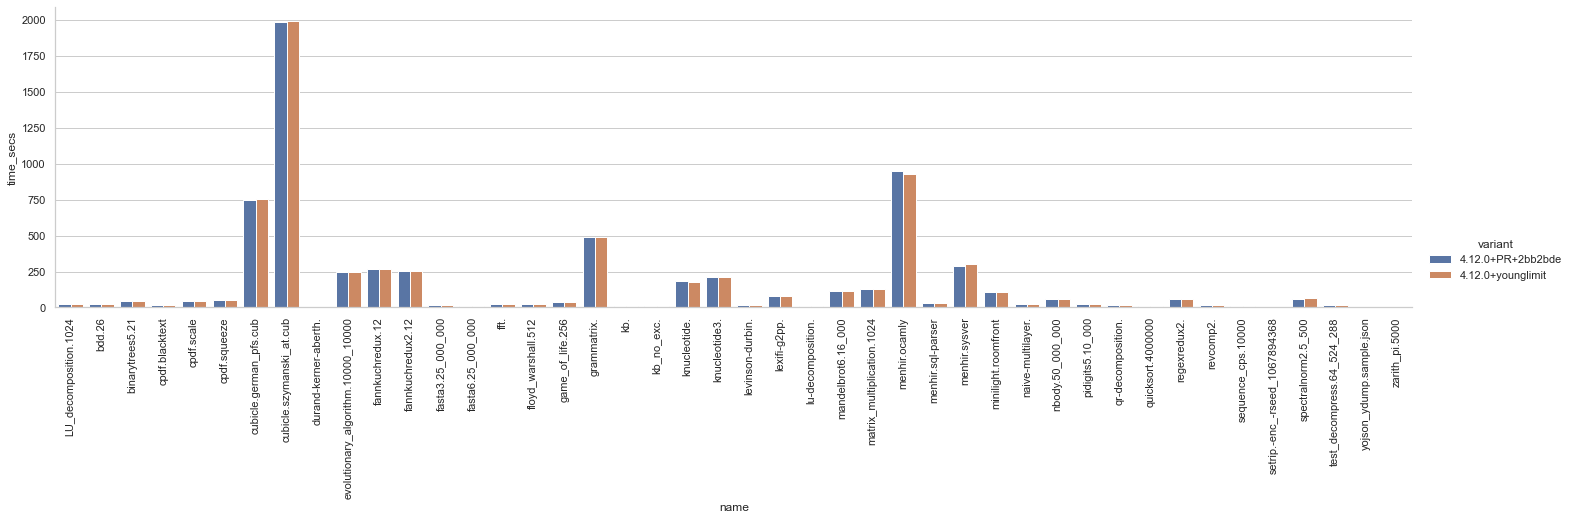

In [7]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [29]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

def dict_diff(df, variant1, variant2, column):
    dict_ds1 = create_column(pd.DataFrame.copy(df), variant1, column)
    dict_ds2 = create_column(pd.DataFrame.copy(df), variant2, column)
    name = dict_ds1.keys()
    return {n:(dict_ds1[n], dict_ds2[n]) for n in name}

def add_minor_collections_diff(df, variant1, variant2):
    name_v1_v2 = dict_diff(pd.DataFrame.copy(df), variant1, variant2, 'gc.minor_collections')
    name = name_v1_v2.keys()
    kv = {}
    for n in name:
        v1, v2 = name_v1_v2[n]
#         print(v1, v2)
        if v2 == 0:
            kv[n] = str(v1 - v2) + ' (0.0%)'
        else:
#             print(v1[n], v2[n])
            percent = round(((v1 - v2)*100)/v2,2)
            kv[n] = str(v1 - v2) + ' (' + str(percent) + '%)'
    return pd.DataFrame.from_records(zip(kv.keys(), kv.values()), columns=['name', 'minor collections change (cached vs uncached)'])

def add_runtime_diff(df, variant1, variant2):
    kv = dict_diff(pd.DataFrame.copy(df), variant1, variant2, 'time_secs')
    new_df = pd.DataFrame.from_records(zip(kv.keys(), [round(100*((kv[k][1] - kv[k][0])/kv[k][1]),2) for k in kv.keys()]), columns=['name', 'runtime change'])
    new_df['cached'] = [kv[k][0] for k in kv]
    new_df['uncached'] = [kv[k][1] for k in kv]
    return new_df

|    | name                               | runtime change   |      cached |   uncached | minor collections change (cached vs uncached)   |
|---:|:-----------------------------------|:-----------------|------------:|-----------:|:------------------------------------------------|
| 35 | quicksort.4000000                  | 6.15%            |    9.37238  |    9.98706 | 0 (0.0%)                                        |
|  1 | bdd.26                             | 4.86%            |   24.0601   |   25.2893  | 2 (0.04%)                                       |
| 27 | menhir.ocamly                      | 2.4%             |  927.577    |  950.364   | 0 (0.0%)                                        |
| 20 | knucleotide.                       | 2.39%            |  178.394    |  182.768   | 0 (0.0%)                                        |
| 14 | fft.                               | 1.48%            |   24.2063   |   24.569   | 363 (35.38%)                                    |
|  2 | binarytrees5.

<ipython-input-29-1da041f0d594>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['b'+topic] = grouped.get_group(variant)[topic].values


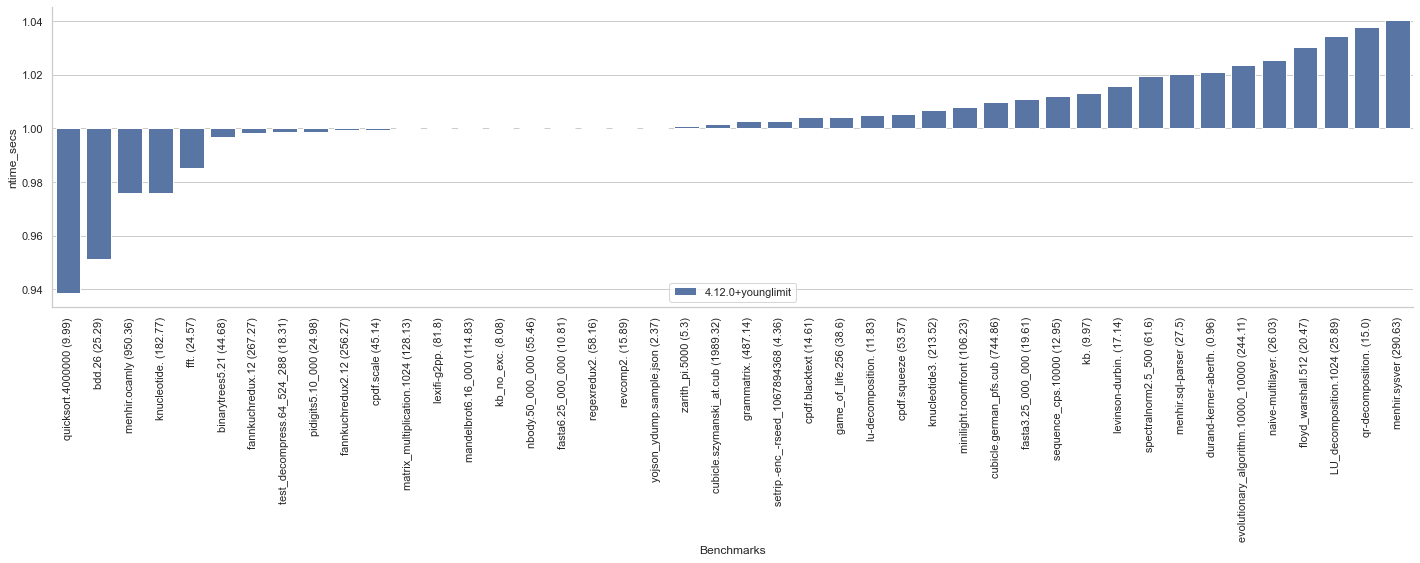

In [31]:
l = add_minor_collections_diff(pd.DataFrame.copy(df), '4.12.0+younglimit', '4.12.0+PR+2bb2bde')
r = add_runtime_diff(pd.DataFrame.copy(df), '4.12.0+younglimit', '4.12.0+PR+2bb2bde')
new_df = pd.merge(l, r, on='name')
new_df = new_df[['name', 'runtime change', 'cached', 'uncached', 'minor collections change (cached vs uncached)']]

new_df = new_df.sort_values(by=['runtime change'], ascending=False)
new_df['runtime change'] = [str(x)+'%' for x in new_df['runtime change']]
print(new_df.to_markdown())

ndf = normalise(df,'4.12.0+PR+2bb2bde','time_secs')
plot_normalised(ndf,'4.12.0+PR+2bb2bde','ntime_secs')

## Top heap words

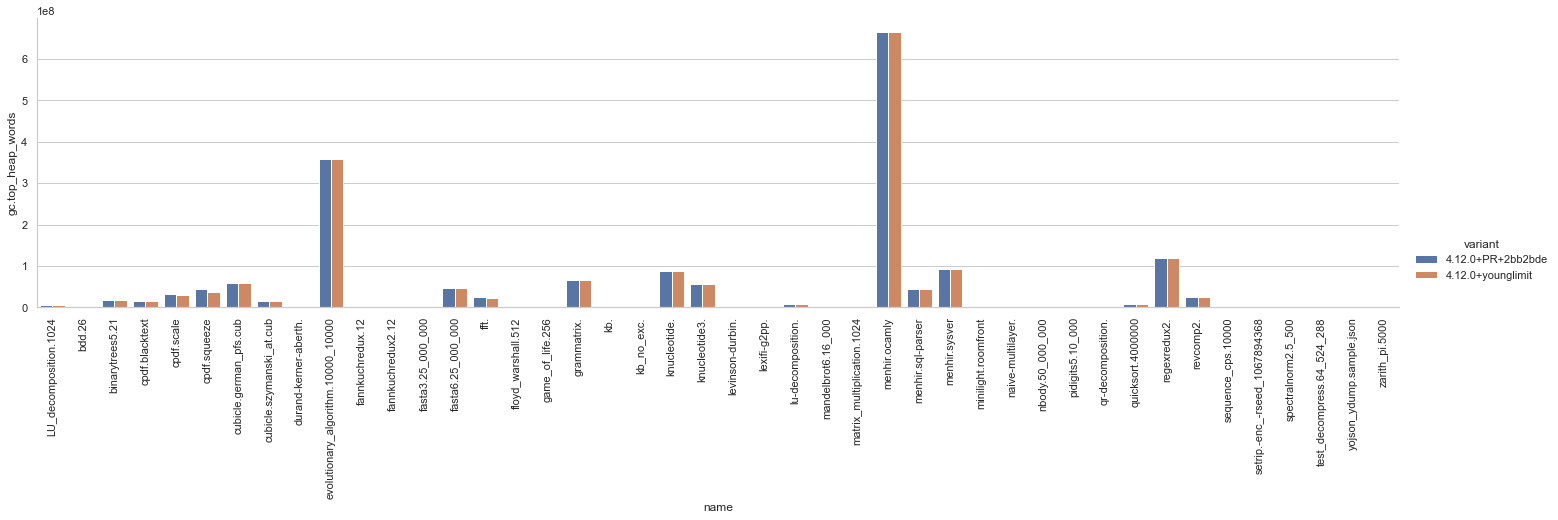

In [10]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [11]:
ndf = normalise(df,'4.06.1+stock','gc.top_heap_words')
plot_normalised(ndf,'4.06.1+stock','ngc.top_heap_words')

KeyError: 'LU_decomposition.1024'

## Max RSS (KB)

In [ ]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df,'4.06.1+stock','maxrss_kB')
plot_normalised(ndf,'4.06.1+stock','nmaxrss_kB')

## Major Collections

In [ ]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df,'4.06.1+stock','gc.major_collections')
plot_normalised(ndf,'4.06.1+stock','ngc.major_collections')
ndf

## Major words

In [ ]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df,'4.06.1+stock','gc.major_words')
plot_normalised(ndf,'4.06.1+stock','ngc.major_words')

## Minor Collections

In [ ]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

In [ ]:
ndf = normalise(df,'4.06.1+stock','gc.minor_collections')
plot_normalised(ndf,'4.06.1+stock','ngc.minor_collections')

# Latency

In [ ]:
data_frames = []

for file in glob.glob("*.pausetimes_*.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        ldf = pdjson.json_normalize(data)
        ldf['variant'] = file.replace(".pausetimes_multicore.bench","").replace(".pausetimes_trunk.bench","")
        data_frames.append(ldf)

df2 = pd.concat(data_frames, sort=False)
df2 = df2.sort_values(['name'])

## Drop some benchmarks
df2 = df2[(df2.name != 'alt-ergo.fill.why') & #multicore version does not exist
        (df2.name != 'alt-ergo.yyll.why') & #multicore version does not exist
        (df2.name != 'frama-c.slevel') &    #multicore version does not exist
        (df2.name != 'js_of_ocaml.frama-c_byte') &    #multicore version does not exist
        (df2.name != 'cpdf.merge')]         #Not a macro benchmark. Will be removed from subsequent runs.
df2.count()
latency_df = df2
df2

The latency distributions `distr_latency` are a list of latencies at `[10,20,30,40,50,60,70,80,90,95,99,99.9]`th percentiles.

## Max latency

In [ ]:
df2.filter(["name","variant","max_latency"])

In [ ]:
def plotLatencyAt(df,at,aspect):
    fdf = df.filter(["name","variant",at + "_latency"])
    fdf.sort_values(by=[at + '_latency'],inplace=True)
    fdf[at + "_latency"] = fdf[at + "_latency"] / 1000.0
    g = sns.catplot (x='name', y=at+'_latency', hue='variant', data = fdf, kind ='bar', aspect=aspect)
    g.set_xticklabels(rotation=90)
    g.ax.set_ylabel(at + " latency (microseconds)")
    g.ax.set_xlabel("Benchmarks")
    g.ax.set_yscale('log')
    return g

plotLatencyAt(df2,"max",4)

## 99.9th percentile latency

In [ ]:
def getLatencyAt(df,percentile,idx):
    groups = df.groupby('variant')
    ndfs = []
    for group in groups:
        (v,df) = group
        for i, row in df.iterrows():
            df.at[i,percentile+"_latency"] = list(df.at[i,"distr_latency"])[idx]
        ndfs.append(df)
    return pd.concat(ndfs)

df2 = getLatencyAt(df2,"99.9",-1)
plotLatencyAt(df2,"99.9",4)

## 99th percentile latency

In [ ]:
df2 = getLatencyAt(df2,"99",-2)
plotLatencyAt(df2,"99",4)